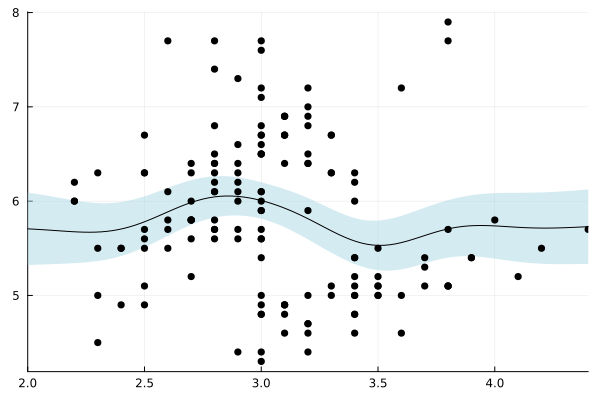

In [1]:
using Optim, Plots
using CRRao, RDatasets, StatsPlots, StatsModels
using StatsModels, DataFrames, Statistics, StatsBase, Distances, GaussianProcesses

struct GPRegression
end


function fit(formula, data::DataFrame, modelClass::GPRegression, mean, kern::Kernel, 
        DistanceClass::Euclidean)
    
    formula = apply_schema(formula, schema(formula, data), RegressionModel)
    y, X = modelcols(formula, data);
    logObsNoise = -1.0
    gp = GP(X',y, mean,kern,logObsNoise)
    optimize!(gp)
    return gp
   
end

using DataFrames, RDatasets, Random, SpecialFunctions, Distributions, MLDatasets
iris = Iris()
df2 = iris.features
a=df2.sepallength

#dummy vector and matrix to check if the functions work
r=rand(a,150)
m=rand(Float64,1,150)
#checking for all mean and kernel functions

#Isotropic kernel and const mean
gp4lin=fit(@formula(sepallength ~0+sepalwidth),df2,GPRegression(),MeanConst(0.0), RQIso(1.5,0.1,1.5),Euclidean()) 
plot(gp4lin, label="")


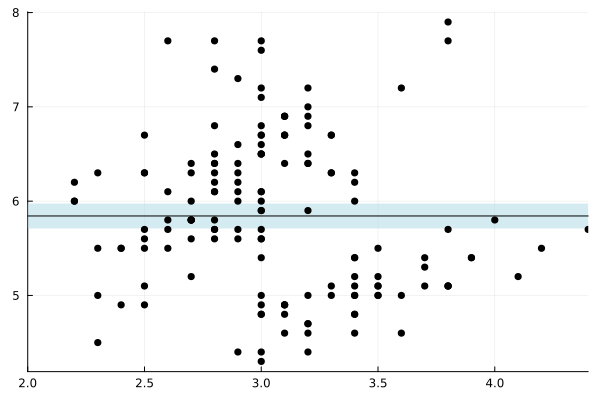

In [22]:
#constant kernel zero mean
gp5lin=fit(@formula(sepallength ~0+sepalwidth),df2,GPRegression(),MeanZero(), Const(0.0),Euclidean()) 
plot(gp5lin,label="")

┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\giggl\.julia\packages\LineSearches\G1LRk\src\hagerzhang.jl:148


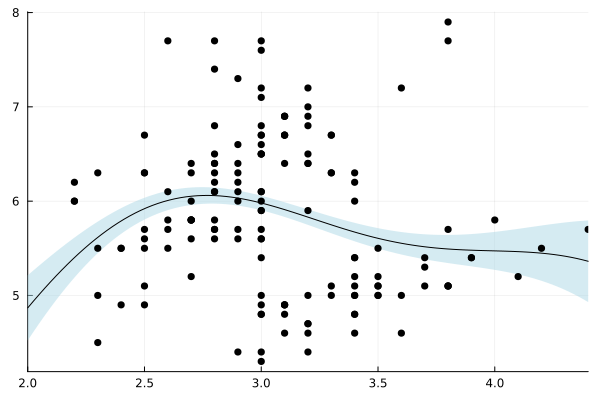

In [26]:
#polynomial mean and squared expon kernel
n=zeros(Float64,1,150)
gp6lin=fit(@formula(sepallength ~0+sepalwidth),df2,GPRegression(),MeanPoly(n), SE(0.0,0.0),Euclidean()) 
plot(gp6lin,label="")

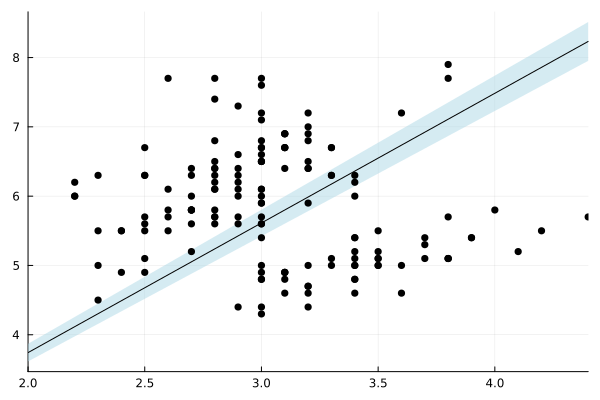

In [36]:
#zero mean linear kernel
gp9lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Lin(1.0),Euclidean()) 
plot(gp9lin,label="")

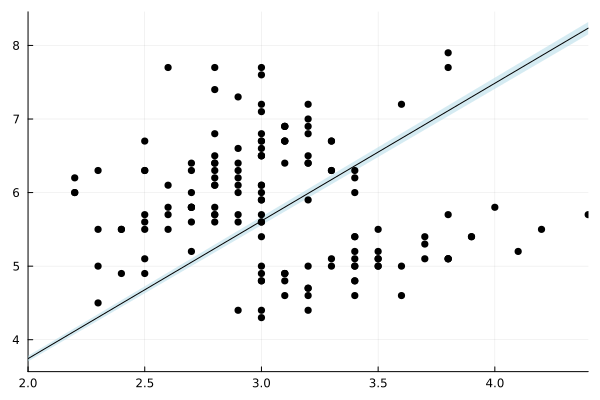

In [43]:
#zero mean and linear kernel with vector input
r=vec(r)
gp10lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), LinArd(r),Euclidean()) 
plot(gp10lin,label="")

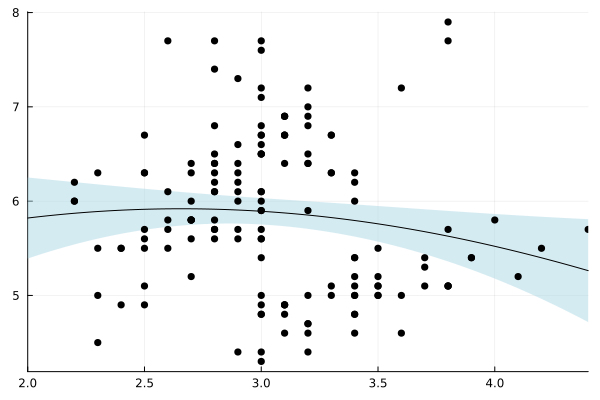

In [44]:

gp8lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), SE(0.0,0.0),Euclidean()) 
plot(gp8lin,label="")

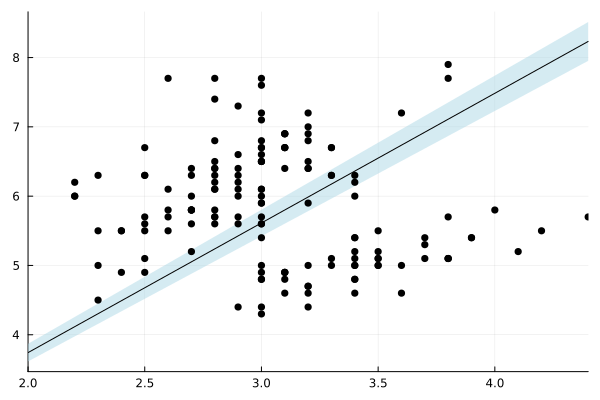

In [45]:
#linear isotropic kernel
gp11lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), LinIso(0.11),Euclidean()) 
plot(gp11lin,label="")

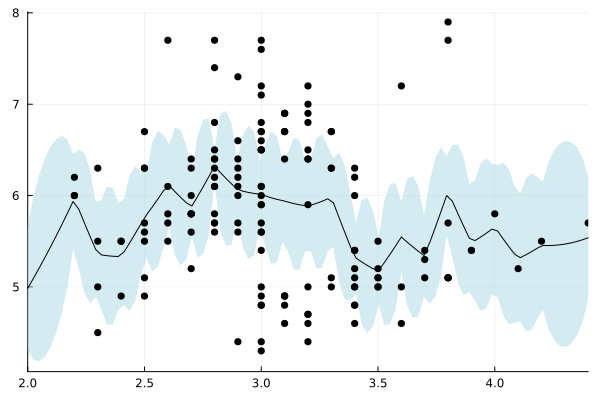

In [46]:
#ARD Matern 1/2 kernel
gp12lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Mat12Ard(r,0.5),Euclidean()) 
plot(gp12lin,label="")

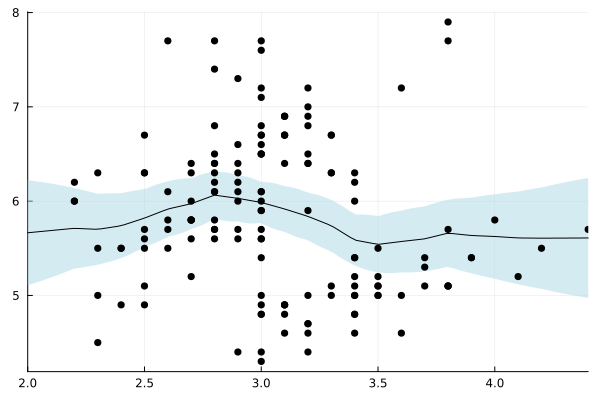

In [48]:
#Isotropic Matern 1/2 kernel
gp13lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Mat12Iso(0.5,0.5),Euclidean()) 
plot(gp13lin,label="")

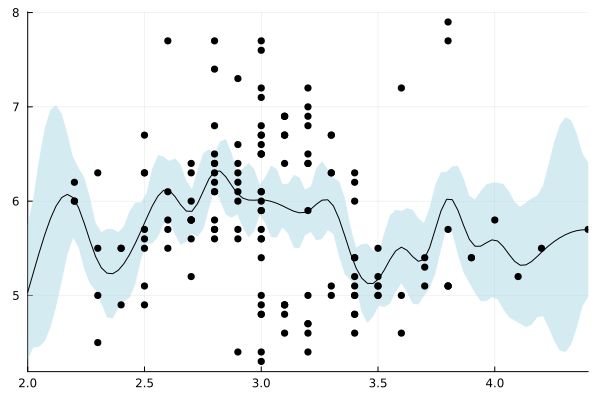

In [49]:
#Isotropic Matern 3/2 kernel
gp14lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Mat32Ard(r,2.5),Euclidean()) 
plot(gp14lin,label="")

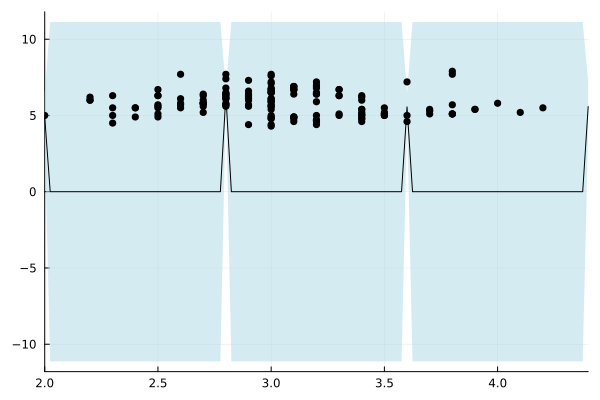

In [52]:
#noise kernel
gp15lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Noise(0.2),Euclidean())  
plot(gp15lin,label="")

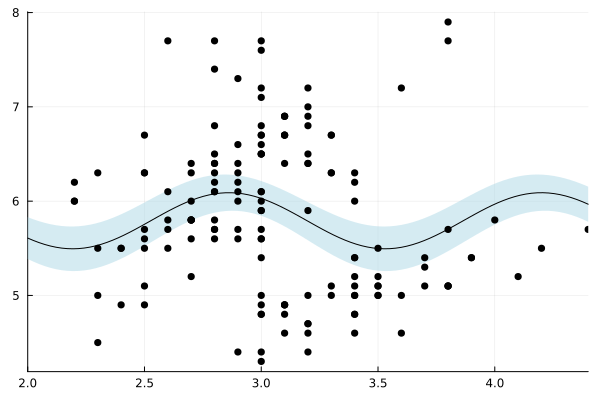

In [53]:
#periodic kernel
gp16lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Periodic(0.2,0.1,0.1),Euclidean()) 
plot(gp16lin,label="")

LinearAlgebra.PosDefException(142)


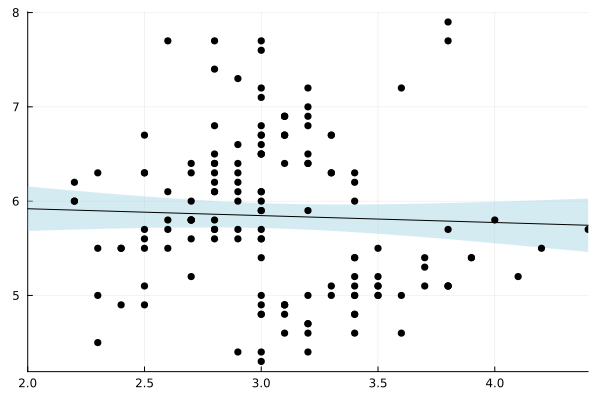

In [54]:
#polynomial kernel 
gp17lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), Poly(0.2,0.1,8),Euclidean()) 
plot(gp17lin,label="")

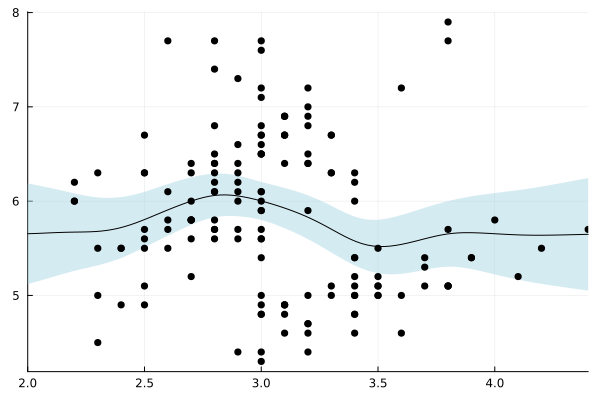

In [55]:
#rational quadratic kernel
gp18lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), RQ(0.2,0.1,0.8),Euclidean()) 
plot(gp18lin,label="")

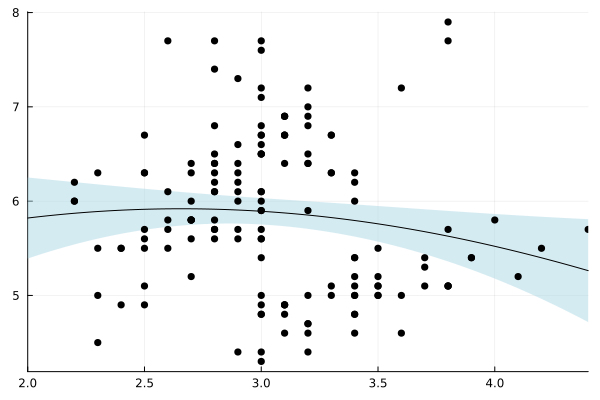

In [58]:
#Isotropic Squared Exponential kernel
gp20lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), SEIso(0.2,0.1),Euclidean()) 
plot(gp20lin,label="")

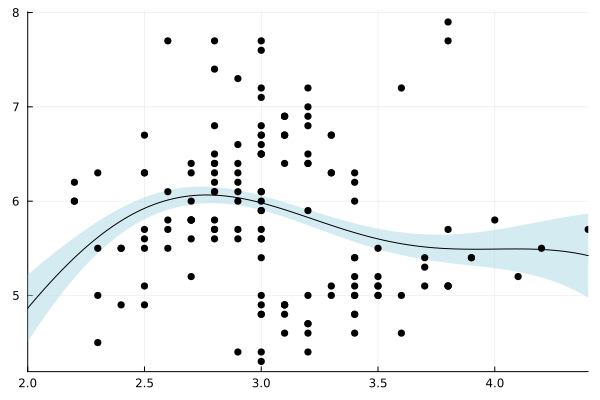

In [59]:
#ARD Squared Exponential kernel
gp21lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), SEArd(r,0.1),Euclidean())
plot(gp21lin,label="")

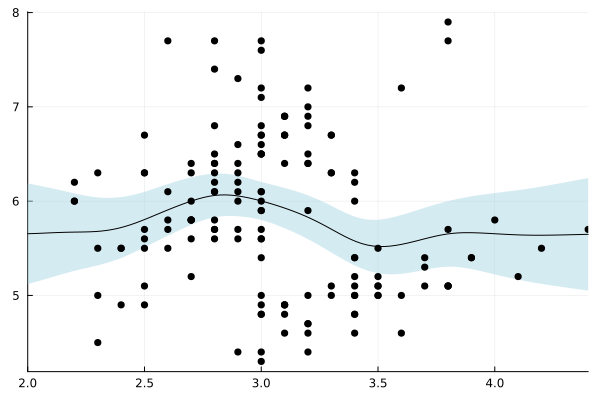

In [3]:
gp19lin=fit(@formula(sepallength ~-1+sepalwidth),df2,GPRegression(),MeanZero(), RQIso(0.1,0.2,0.1),Euclidean()) 
plot(gp19lin,label="")